In [3]:
"""
Linear Regression with TensorFlow
parksurk@gmail.com
"""

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
#matplotlib inline
print ("Packages are loaded!!!")

Packages are loaded!!!



Type of 'train_X' is  <class 'numpy.ndarray'>
Shape of 'train_X' is (1, 20)
Type of 'train_Y' is  <class 'numpy.ndarray'>
Shape of 'train_Y' is (1, 20)


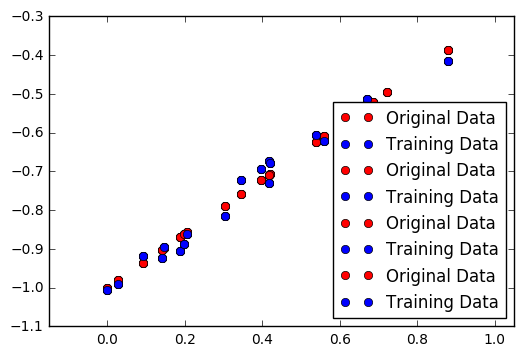

In [6]:
# Generate training data
np.random.seed(1)
def f(x, a, b):
    n = train_X.size
    vals = np.zeros((1, n))
    for i in range(0, n):
        ax = np.multiply(a, x.item(i))
        val = np.add(ax, b)
        vals[0, i] = val
    return vals

Wref = 0.7
bref = -1.
n = 20
noise_var = 0.001
train_X = np.random.random((1,n))
ref_Y = f(train_X, Wref, bref)
train_Y = ref_Y + np.sqrt(noise_var)*np.random.randn(1,n)
n_samples = train_X.size

print ("")
print ("Type of 'train_X' is ", type(train_X))
print ("Shape of 'train_X' is %s" % (train_X.shape,))
print ("Type of 'train_Y' is ", type(train_Y))
print ("Shape of 'train_Y' is %s" % (train_Y.shape,))

# Plot
plt.figure(1)
plt.plot(train_X[0, :], ref_Y[0, :], 'ro', label="Original Data")
plt.plot(train_X[0, :], train_Y[0, :], 'bo', label="Training Data")
plt.axis('equal')
plt.legend(loc='lower right')
plt.show()

In [7]:
# Prepare for Linear Regression

# Parameters
training_epochs = 2000
display_step = 50

# Set Tensorflow Graph
X = tf.placeholder(tf.float32, name="input")
Y = tf.placeholder(tf.float32, name="output")
W = tf.Variable(np.random.randn(), name="weight")
b = tf.Variable(np.random.randn(), name="bias")

# Construct a Model
activation = tf.add(tf.mul(X, W), b)

# Define Error Measure and Optimizer
learning_rate = 0.01
cost = tf.reduce_mean(tf.pow(activation-Y, 2))
#learning_rate = 0.001
#cost = tf.sqrt(tf.reduce_mean(tf.pow(activation-Y, 2)))
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost) #Gradient Descent

"""
 tf.reduce_sum()
 tf.reduce_mean()
 _____

 tf.pow(Yhat, Y, 2)
 tf.nn.softmax_cross_entropy_with_logits(Yhat, Y)
 _____

 tf.train.GradientDescentOptimizer(0.05).minimize(cost)
 tf.train.RMSPropOptimizer(0.001, 0.9).minimize(cost)
"""

# Initializer
init = tf.initialize_all_variables()


In [12]:
# Run
sess = tf.Session()

# Initialize
sess.run(init)
for epoch in range(training_epochs):
    for (x, y) in zip(train_X[0, :], train_Y[0, :]):
        # print ("x: ", x, "y: ", y)
        sess.run(optimizer, feed_dict={X:x, Y:y})
        
    # Check cost
    if (epoch % display_step == 0):
        costval = sess.run(cost, feed_dict={X:train_X, Y:train_Y})
        print ("Epoch:", "%04d" % (epoch+1), "cost=", "{:.5f}".format(costval))
        Wtemp = sess.run(W)
        btemp = sess.run(b)
        print (" Wtemp is", "{:.4f}".format(Wtemp), "btemp is", "{:.4f}".format(btemp))
        print (" Wref is", "{:.4f}".format(Wref), "bref is", "{:.4f}".format(bref))
        
# Final W and b
Wopt = sess.run(W)
bopt = sess.run(b)
fopt = f(train_X, Wopt,bopt)

Epoch: 0001 cost= 0.21532
 Wtemp is -0.6964 btemp is -0.1715
 Wref is 0.7000 bref is -1.0000
Epoch: 0051 cost= 0.01696
 Wtemp is 0.1656 btemp is -0.7954
 Wref is 0.7000 bref is -1.0000
Epoch: 0101 cost= 0.00264
 Wtemp is 0.5047 btemp is -0.9280
 Wref is 0.7000 bref is -1.0000
Epoch: 0151 cost= 0.00083
 Wtemp is 0.6247 btemp is -0.9750
 Wref is 0.7000 bref is -1.0000
Epoch: 0201 cost= 0.00060
 Wtemp is 0.6672 btemp is -0.9916
 Wref is 0.7000 bref is -1.0000
Epoch: 0251 cost= 0.00057
 Wtemp is 0.6823 btemp is -0.9975
 Wref is 0.7000 bref is -1.0000
Epoch: 0301 cost= 0.00057
 Wtemp is 0.6876 btemp is -0.9996
 Wref is 0.7000 bref is -1.0000
Epoch: 0351 cost= 0.00056
 Wtemp is 0.6895 btemp is -1.0003
 Wref is 0.7000 bref is -1.0000
Epoch: 0401 cost= 0.00056
 Wtemp is 0.6901 btemp is -1.0006
 Wref is 0.7000 bref is -1.0000
Epoch: 0451 cost= 0.00056
 Wtemp is 0.6904 btemp is -1.0007
 Wref is 0.7000 bref is -1.0000
Epoch: 0501 cost= 0.00056
 Wtemp is 0.6905 btemp is -1.0007
 Wref is 0.7000 bre

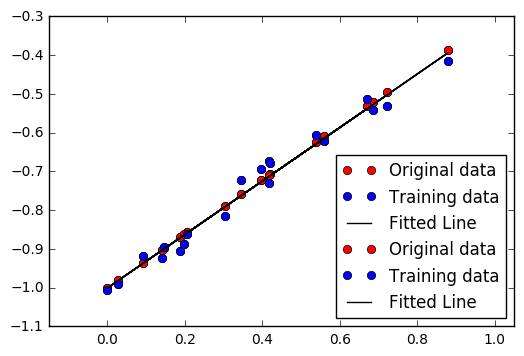

In [14]:

# Plot Results
plt.figure(2)
plt.plot(train_X[0, :], ref_Y[0, :], 'ro', label='Original data')
plt.plot(train_X[0, :], train_Y[0, :], 'bo', label='Training data')
plt.plot(train_X[0, :], fopt[0, :], 'k-', label='Fitted Line')
plt.axis('equal')
plt.legend(loc='lower right')
plt.show()